In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [85]:

# Read the CSV file
Data = pd.read_csv("D:\code\python\Data mining\Data-Mining-Data-Sets-CSV-Master\castle-solutions-2.csv")

# Display first few rows
print(Data.head())

# Display info about the DataFrame
print(Data.info())

# Generate and print descriptive statistics for numerical columns
print(Data.describe())

   Castle 1  Castle 2  Castle 3  Castle 4  Castle 5  Castle 6  Castle 7  \
0       0.0       1.0       2.0      16.0      21.0       3.0       2.0   
1       0.0       3.0       4.0      14.0      15.0       5.0       5.0   
2       0.0       0.0       0.0      15.0      19.0       1.0       1.0   
3       3.0       3.0       3.0      17.0      17.0       3.0       4.0   
4       0.0       0.0       0.0      16.0      21.0       0.0       0.0   

   Castle 8  Castle 9  Castle 10  \
0       1.0      32.0       22.0   
1       5.0      33.0       16.0   
2       1.0      32.0       31.0   
3       4.0      23.0       23.0   
4       0.0      36.0       27.0   

           Why did you choose your troop deployment?  
0  Good against the last round; great against eve...  
1  I figure most people will use strategies that ...  
2  Previous winner won 84%. Took the 90%ile of th...  
3  10+9+5+4=28 for the win.  Plus, if you put 0 i...  
4  Near optimal integer program vs previous round...  
<c

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_24660\2476933890.py:2: SyntaxWarning: invalid escape sequence '\c'
  Data = pd.read_csv("D:\code\python\Data mining\Data-Mining-Data-Sets-CSV-Master\castle-solutions-2.csv")


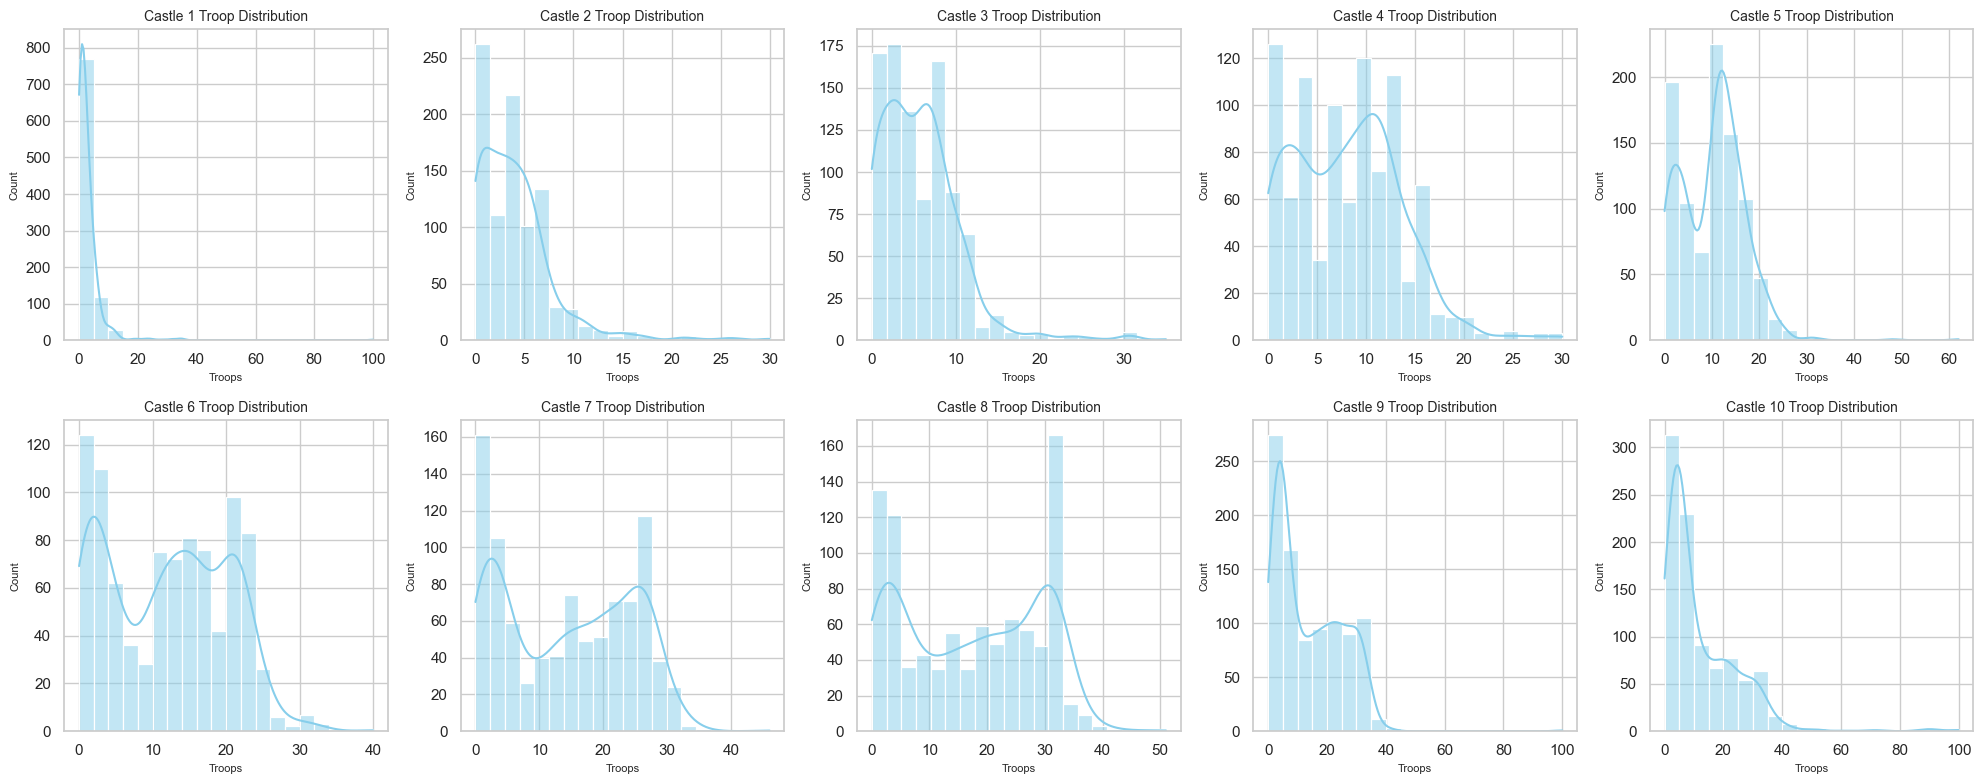

In [86]:

# Set the overall figure size and layout
plt.figure(figsize=(20, 8))  # Wider to fit 5 columns

# Create a 2x5 grid of subplots
for i in range(1, 11):
    plt.subplot(2, 5, i)  # 2 rows, 5 columns, current subplot position
    sns.histplot(Data[f'Castle {i}'], bins=20, kde=True, color='skyblue')
    plt.title(f'Castle {i} Troop Distribution', fontsize=10)
    plt.xlabel('Troops', fontsize=8)
    plt.ylabel('Count', fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24660\3906770499.py:15: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


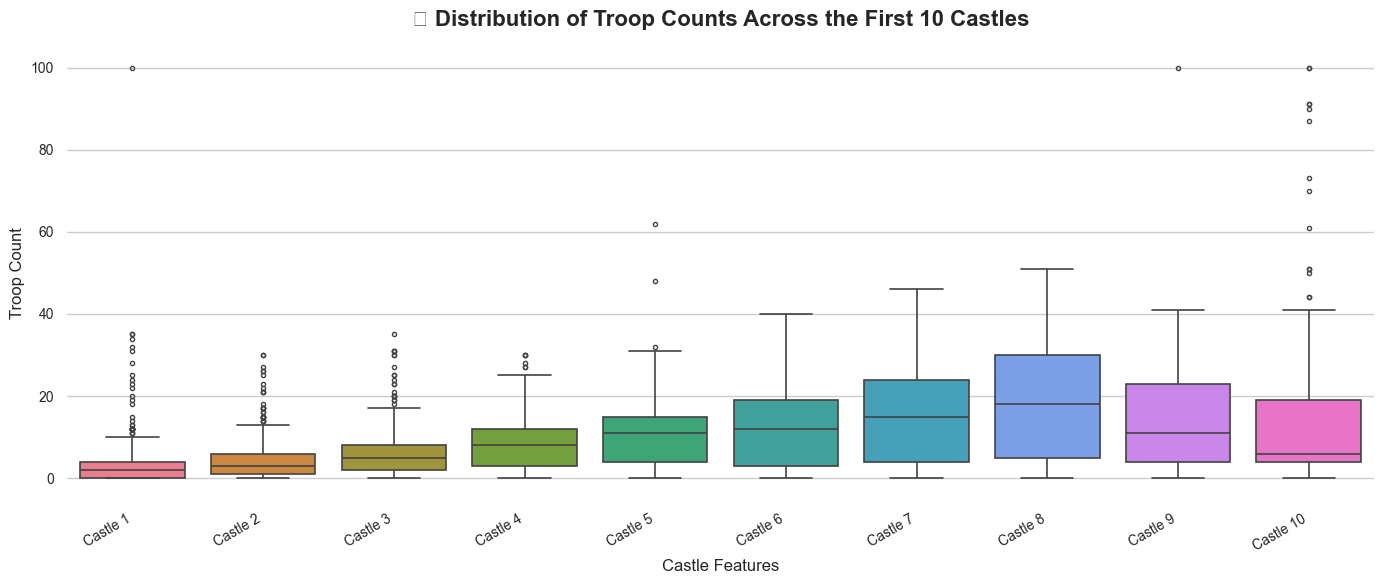

In [87]:

sns.set_theme(style="whitegrid", palette="Set2")
plt.figure(figsize=(14, 6))
ax = sns.boxplot(
    data=Data.iloc[:, 0:10], 
    linewidth=1.2, 
    fliersize=3,           
    saturation=0.8        
)
plt.title('🏰 Distribution of Troop Counts Across the First 10 Castles', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Castle Features', fontsize=12)
plt.ylabel('Troop Count', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

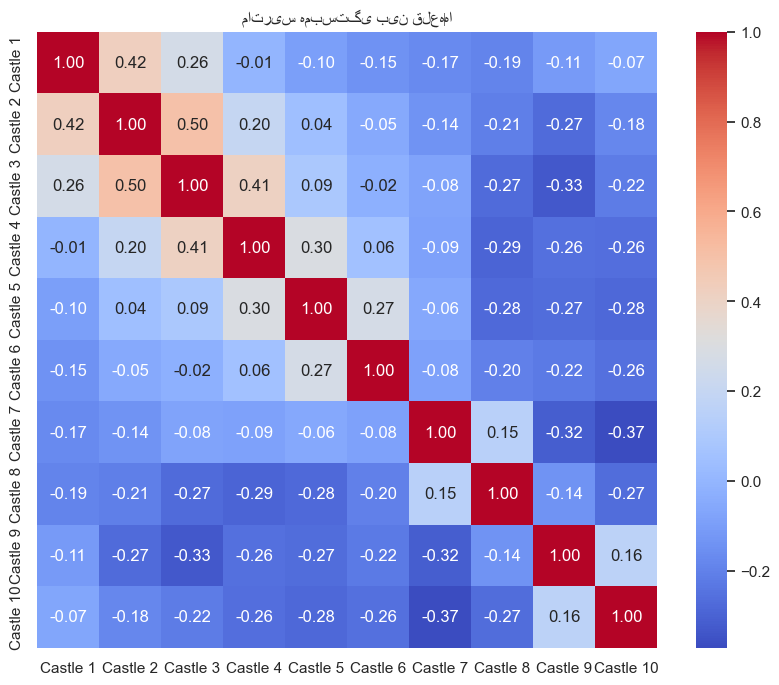

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(Data.iloc[:, 0:10].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('ماتریس همبستگی بین قلعه‌ها')
plt.show()


| قلعه      | میانگین نیرو | بیشترین مقدار | انحراف معیار |
| --------- | ------------ | ------------- | ------------ |
| Castle 1  | 2.81         | 100           | 5.02         |
| Castle 5  | 10.22        | 62            | 6.62         |
| Castle 10 | 12.10        | 100           | 12.72        |
| Castle 8  | 17.15        | 51            | 11.80        |


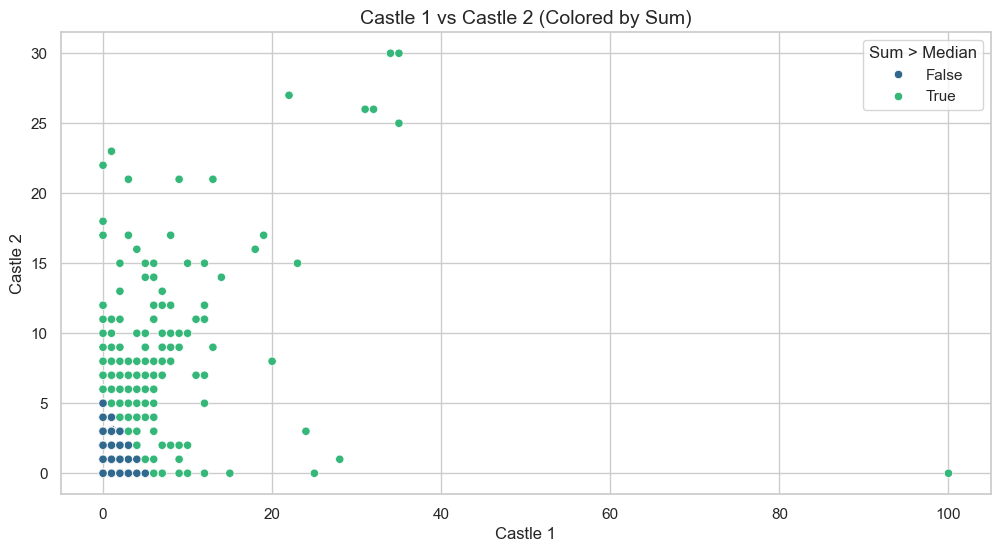

In [89]:
# Create a binary feature based on sum of Castle 1 and Castle 2
Data['Sum_C1_C2'] = Data['Castle 1'] + Data['Castle 2']
median_sum = Data['Sum_C1_C2'].median()
Data['Above_Median'] = Data['Sum_C1_C2'] > median_sum

# Plot with coloring
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Castle 1', y='Castle 2', hue='Above_Median', data=Data, palette='viridis')
plt.title('Castle 1 vs Castle 2 (Colored by Sum)', fontsize=14)
plt.xlabel('Castle 1', fontsize=12)
plt.ylabel('Castle 2', fontsize=12)
plt.legend(title='Sum > Median')
plt.show()

This code creates a scatter plot comparing the number of troops deployed to Castle 1 and Castle 2 in the "Battle for Riddler Nation" dataset. The points are colored based on whether the sum of troops in Castle 1 and Castle 2 is above the median or not.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24660\719281335.py:42: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


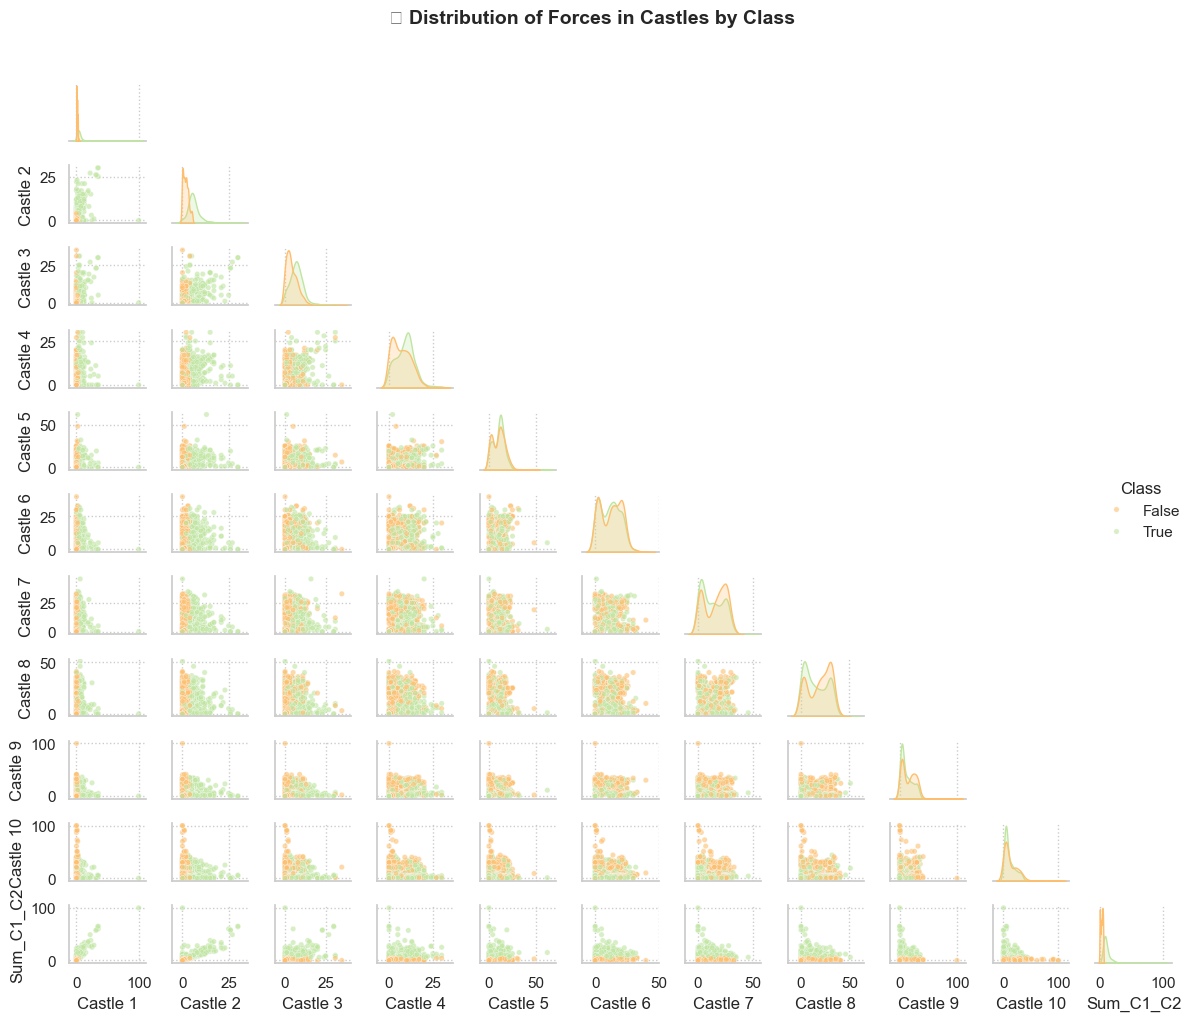

In [ ]:

if 'Class' not in Data.columns:
    Data['Class'] = (Data['Sum_C1_C2'] > Data['Sum_C1_C2'].median()).astype('category')

numeric_cols = Data.select_dtypes(include=['int', 'float']).columns.tolist()

# Remove 'Class' if it's mistakenly in numeric columns
if 'Class' in numeric_cols:
    numeric_cols.remove('Class')

sns.set_style("whitegrid", {'grid.linestyle': ':'})

g = sns.pairplot(
    data=Data[numeric_cols + ['Class']],   
    hue='Class',
    palette='Spectral',
    plot_kws={
        's': 15,
        'alpha': 0.6,
        'edgecolor': 'w'
    },
    diag_kind='kde',  
    corner=True        
)

g.fig.set_size_inches(12, 10)
g.fig.suptitle('📊 Distribution of Forces in Castles by Class', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
